# **Multilabel Classification for Clothing Type and Color Using Convolutional Neural Network (CNN)**
* Background

In today’s digital era, image recognition has become one of the most crucial fields in artificial intelligence and machine learning. One interesting application of image recognition is clothing classification based on type and color. By leveraging deep learning techniques, we can build a model capable of identifying the type of clothing (such as a t-shirt or hoodie) and its color (such as red, yellow, blue, black, or white) from an image.

Matos Fashion, a rapidly growing e-commerce startup, faces the challenge of managing an expanding product inventory. To enhance operational efficiency and improve the shopping experience for customers, Matos Fashion plans to develop an automated classification system using product photos. This system will be able to categorize products based on type (such as t-shirt or hoodie) and color (red, yellow, blue, black, or white). By implementing this system, Matos Fashion hopes to manage its inventory more effectively and provide a smoother shopping experience for its customers.

* Objective

This notebook aims to build and train a multilabel classification model using a Convolutional Neural Network (CNN). The model will be trained to recognize both the type and color of clothing from provided images. We will use a dataset consisting of labeled clothing images categorized by type and color.

### Import Library

In [1]:
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import tensorflow as tf  # Untuk membangun dan melatih model deep learning
from tensorflow.keras.preprocessing import image  # Untuk memproses gambar
from tensorflow.keras import layers, Model  # Untuk membangun arsitektur model
import ipywidgets as widgets  # Untuk membuat widget interaktif
from IPython.display import display  # Untuk menampilkan widget
from io import BytesIO  # Untuk operasi I/O dengan byte
import pandas as pd  # Untuk manipulasi data
import PIL  # Untuk pemrosesan gambar
import os  # Untuk operasi file dan direktori
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report  # Untuk evaluasi model
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/penyisihan-hology-7-data-mining-competition/sample_submission.csv
/kaggle/input/penyisihan-hology-7-data-mining-competition/train.csv
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1075.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/820.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1024.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/785.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/792.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1009.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/915.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/815.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/817.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1055.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/795.jpg
/kaggle/inpu

### Membaca Dataset

In [2]:
# Tentukan path ke direktori dataset
train_dir = '/kaggle/input/ds-bismillah/train'  # Ganti dengan path ke direktori data pelatihan
test_dir = '/kaggle/input/ds-bismillah/test'  # Ganti dengan path ke direktori data pengujian
train_csv_path = '/kaggle/input/ds-bismillah/train.csv'  # Ganti dengan path ke file CSV data pelatihan

# Membaca data pelatihan dari file CSV
train_data = pd.read_csv(train_csv_path)

In [3]:
# Fungsi untuk membaca gambar dari direktori
def load_images(data_frame, image_dir):
    images = []
    for img_id in data_frame['id']:
        img_path_jpg = os.path.join(image_dir, f"{img_id}.jpg")
        img_path_png = os.path.join(image_dir, f"{img_id}.png")

        try:
            if os.path.exists(img_path_jpg):
                img = PIL.Image.open(img_path_jpg).resize((128, 128))
            elif os.path.exists(img_path_png):
                img = PIL.Image.open(img_path_png).resize((128, 128))
            else:
                print(f"File tidak ditemukan untuk ID: {img_id}")
                continue
            images.append(np.array(img))

        except Exception as e:
            print(f"Error membuka gambar {img_id}: {e}")
    return np.array(images)

# Memanggil fungsi load_images untuk mengambil semua gambar
train_images = load_images(train_data, train_dir)

In [4]:
# Normalisasi gambar
train_images = train_images.astype('float32') / 255.0

In [5]:
# Mendapatkan label dari data pelatihan
jenis_labels = train_data['jenis'].values  # Mendapatkan label jenis dari data pelatihan
warna_labels = train_data['warna'].values  # Mendapatkan label warna dari data pelatihan

In [6]:
jenis_labels = to_categorical(jenis_labels, num_classes=2)  # Mengubah label jenis menjadi one-hot encoding
warna_labels = to_categorical(warna_labels, num_classes=5)  # Mengubah label warna menjadi one-hot encoding

### Membangun dan Mengompilasi Model

In [7]:
# Membangun model
def build_model():
    inputs = layers.Input(shape=(128, 128, 3))  # Input layer dengan bentuk (128, 128, 3)

    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)  # Layer konvolusi dengan 32 filter
    x = layers.MaxPooling2D((2, 2))(x)  # Layer pooling
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)  # Layer konvolusi dengan 64 filter
    x = layers.MaxPooling2D((2, 2))(x)  # Layer pooling
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)  # Layer konvolusi dengan 128 filter
    x = layers.MaxPooling2D((2, 2))(x)  # Layer pooling
    x = layers.Flatten()(x)  # Mengubah tensor 2D menjadi vektor 1D
    x = layers.Dense(128, activation='relu')(x)  # Fully connected layer dengan 128 unit

    # Output layer untuk jenis dan warna
    jenis_output = layers.Dense(2, activation='softmax', name='jenis_output')(x)  # Output layer untuk jenis
    warna_output = layers.Dense(5, activation='softmax', name='warna_output')(x)  # Output layer untuk warna

    model = Model(inputs=inputs, outputs=[jenis_output, warna_output])  # Membuat model

    return model

model = build_model()  # Memanggil fungsi build_model untuk membuat model

model.compile(optimizer='adam',
              loss={'jenis_output': 'categorical_crossentropy', 'warna_output': 'categorical_crossentropy'},
              metrics={'jenis_output': 'accuracy', 'warna_output': 'accuracy'})  # Mengompilasi model

### Melatih Model

In [8]:
# Melatih model
history = model.fit(train_images, [jenis_labels, warna_labels],
                    epochs=10, batch_size=32)  # Melatih model

Epoch 1/10


I0000 00:00:1729491246.386987      69 service.cc:145] XLA service 0x7d36fc00e070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729491246.387090      69 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.5507 - loss: 2.1387 - warna_output_accuracy: 0.4268

I0000 00:00:1729491251.186194      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - jenis_output_accuracy: 0.5769 - loss: 1.9482 - warna_output_accuracy: 0.4980
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.7598 - loss: 0.7006 - warna_output_accuracy: 0.9325
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.8305 - loss: 0.5021 - warna_output_accuracy: 0.9594
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.8482 - loss: 0.4334 - warna_output_accuracy: 0.9500
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.8475 - loss: 0.3888 - warna_output_accuracy: 0.9741
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.8821 - loss: 0.2916 - warna_output_accuracy: 0.9930
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.8710 - loss: 0.2683 - warna_output_accuracy: 0.9878
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - jenis_output_accuracy: 0.9271 - loss: 0.2148 - 

## Menampilkan Akurasi

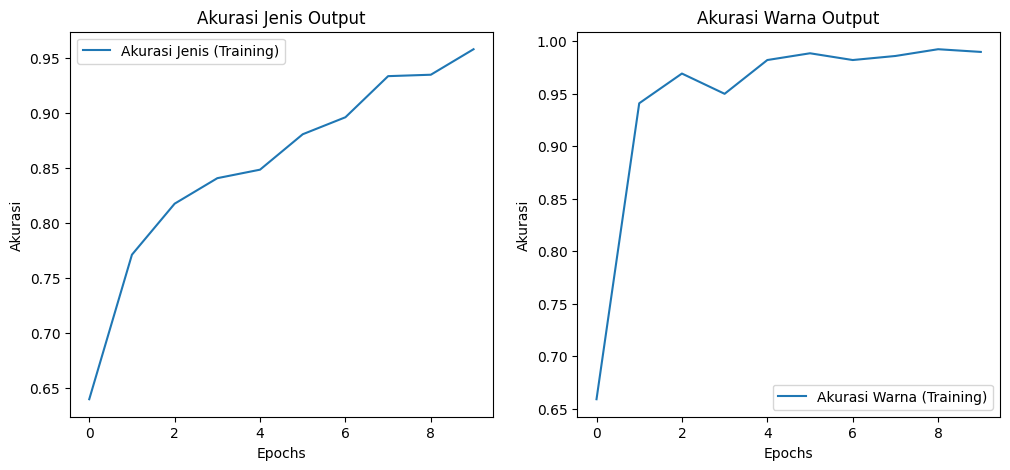

In [9]:
# Menampilkan akurasi
plt.figure(figsize=(12, 5))

# Plot akurasi jenis
plt.subplot(1, 2, 1)
plt.plot(history.history['jenis_output_accuracy'], label='Akurasi Jenis (Training)')
plt.title('Akurasi Jenis Output')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

# Plot akurasi warna
plt.subplot(1, 2, 2)
plt.plot(history.history['warna_output_accuracy'], label='Akurasi Warna (Training)')
plt.title('Akurasi Warna Output')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.show()

### Evaluasi Model pada Data Pelatihan

In [10]:
# Evaluasi model menggunakan data pelatihan
train_predictions = model.predict(train_images)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


### Menyimpan Hasil Prediksi

In [11]:
# Menyimpan hasil prediksi untuk evaluasi
y_pred_jenis_train = np.argmax(train_predictions[0], axis=1)
y_pred_warna_train = np.argmax(train_predictions[1], axis=1)

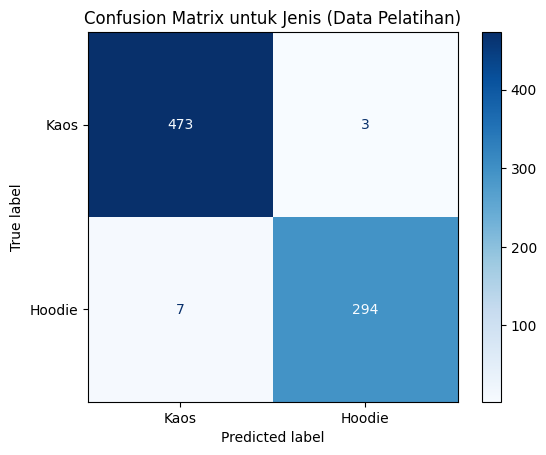

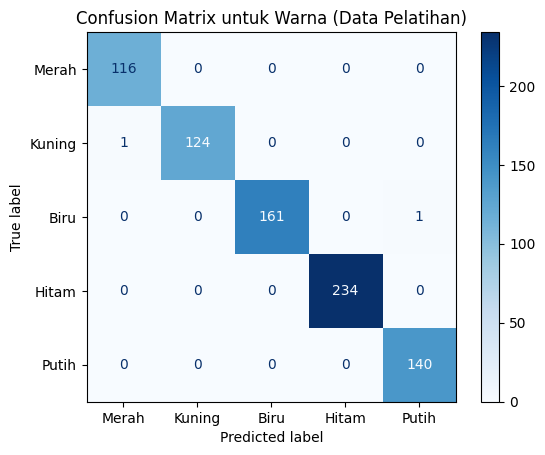

Classification Report untuk Jenis (Data Pelatihan):
               precision    recall  f1-score   support

        Kaos       0.99      0.99      0.99       476
      Hoodie       0.99      0.98      0.98       301

    accuracy                           0.99       777
   macro avg       0.99      0.99      0.99       777
weighted avg       0.99      0.99      0.99       777

Classification Report untuk Warna (Data Pelatihan):
               precision    recall  f1-score   support

       Merah       0.99      1.00      1.00       116
      Kuning       1.00      0.99      1.00       125
        Biru       1.00      0.99      1.00       162
       Hitam       1.00      1.00      1.00       234
       Putih       0.99      1.00      1.00       140

    accuracy                           1.00       777
   macro avg       1.00      1.00      1.00       777
weighted avg       1.00      1.00      1.00       777



In [12]:
# Menghitung dan menampilkan confusion matrix untuk jenis pada data pelatihan
conf_matrix_jenis_train = confusion_matrix(np.argmax(jenis_labels, axis=1), y_pred_jenis_train)
disp_jenis_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_jenis_train, display_labels=['Kaos', 'Hoodie'])
disp_jenis_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix untuk Jenis (Data Pelatihan)')
plt.show()

# Menghitung dan menampilkan confusion matrix untuk warna pada data pelatihan
conf_matrix_warna_train = confusion_matrix(np.argmax(warna_labels, axis=1), y_pred_warna_train)
disp_warna_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_warna_train, display_labels=['Merah', 'Kuning', 'Biru', 'Hitam', 'Putih'])
disp_warna_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix untuk Warna (Data Pelatihan)')
plt.show()

# Hitung metrik evaluasi untuk jenis pada data pelatihan
report_jenis_train = classification_report(np.argmax(jenis_labels, axis=1), y_pred_jenis_train, target_names=['Kaos', 'Hoodie'])
print("Classification Report untuk Jenis (Data Pelatihan):\n", report_jenis_train)

# Hitung metrik evaluasi untuk warna pada data pelatihan
report_warna_train = classification_report(np.argmax(warna_labels, axis=1), y_pred_warna_train, target_names=['Merah', 'Kuning', 'Biru', 'Hitam', 'Putih'])
print("Classification Report untuk Warna (Data Pelatihan):\n", report_warna_train)


#### Mempersiapkan dan Memprediksi pada Data Pengujian

In [13]:
# Mendapatkan daftar semua file gambar di direktori pengujian
test_image_files = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]

# Membuat DataFrame dengan ID gambar (nama file tanpa ekstensi)
test_data = pd.DataFrame({'id': [os.path.splitext(f)[0] for f in test_image_files]})

# Memanggil fungsi load_images untuk mengambil semua gambar pengujian
test_images = load_images(test_data, test_dir)  # Pastikan test_data memiliki kolom 'id'
test_images = test_images.astype('float32') / 255.0  # Normalisasi gambar

# Melakukan prediksi pada data test
test_predictions = model.predict(test_images)

# Menyimpan hasil prediksi ke dalam DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],  # Menggunakan kolom 'id' dari test_data yang sudah difilter
    'jenis': np.argmax(test_predictions[0], axis=1),
    'warna': np.argmax(test_predictions[1], axis=1)
})
# Menyimpan DataFrame ke CSV
submission_csv_path = '/kaggle/working/test_labels.csv'  # Ganti dengan path yang diinginkan
submission.to_csv(submission_csv_path, index=False)
print("Hasil submission disimpan di:", submission_csv_path)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Hasil submission disimpan di: /kaggle/working/test_labels.csv


### Evaluasi Model pada Data Pengujian

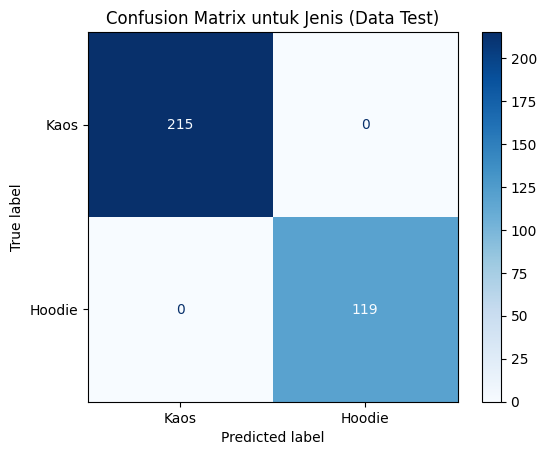

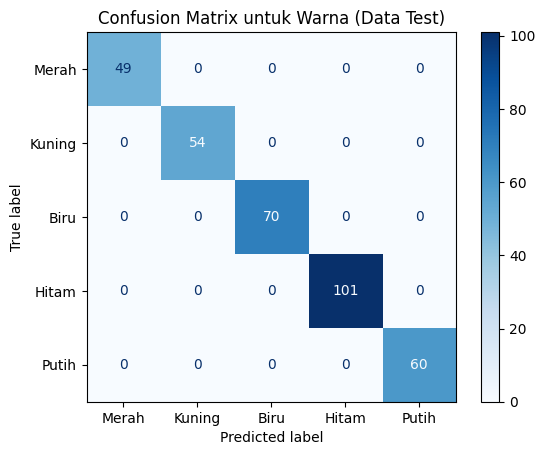

Classification Report untuk Jenis (Data Test):
               precision    recall  f1-score   support

        Kaos       1.00      1.00      1.00       215
      Hoodie       1.00      1.00      1.00       119

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Classification Report untuk Warna (Data Test):
               precision    recall  f1-score   support

       Merah       1.00      1.00      1.00        49
      Kuning       1.00      1.00      1.00        54
        Biru       1.00      1.00      1.00        70
       Hitam       1.00      1.00      1.00       101
       Putih       1.00      1.00      1.00        60

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



In [14]:
test_labels_path = '/kaggle/working/test_labels.csv'  # Ganti dengan path ke file CSV yang berisi label data test
test_labels = pd.read_csv(test_labels_path)

# Menghitung prediksi untuk data test
y_pred_jenis_test = np.argmax(test_predictions[0], axis=1)
y_pred_warna_test = np.argmax(test_predictions[1], axis=1)

# Menghitung dan menampilkan confusion matrix untuk jenis pada data test
conf_matrix_jenis_test = confusion_matrix(test_labels['jenis'].values, y_pred_jenis_test)
disp_jenis_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_jenis_test, display_labels=['Kaos', 'Hoodie'])
disp_jenis_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix untuk Jenis (Data Test)')
plt.show()

# Menghitung dan menampilkan confusion matrix untuk warna pada data test
conf_matrix_warna_test = confusion_matrix(test_labels['warna'].values, y_pred_warna_test)
disp_warna_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_warna_test, display_labels=['Merah', 'Kuning', 'Biru', 'Hitam', 'Putih'])
disp_warna_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix untuk Warna (Data Test)')
plt.show()

# Hitung metrik evaluasi untuk jenis pada data test
report_jenis_test = classification_report(test_labels['jenis'].values, y_pred_jenis_test, target_names=['Kaos', 'Hoodie'])
print("Classification Report untuk Jenis (Data Test):\n", report_jenis_test)

# Hitung metrik evaluasi untuk warna pada data test
report_warna_test = classification_report(test_labels['warna'].values, y_pred_warna_test, target_names=['Merah', 'Kuning', 'Biru', 'Hitam', 'Putih'])
print("Classification Report untuk Warna (Data Test):\n", report_warna_test)

### Conclusion
Model klasifikasi multilabel yang digunakan menunjukkan kinerja yang sangat baik dalam mengklasifikasikan jenis dan warna pakaian. Pada data pelatihan, model mencapai akurasi yang sangat tinggi, dan pada data pengujian, model mencapai akurasi sempurna. Hal ini menunjukkan bahwa model tidak hanya belajar dengan baik dari data pelatihan tetapi juga mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

Kinerja yang sempurna pada data pengujian menunjukkan bahwa model sangat akurat dan dapat diandalkan untuk tugas klasifikasi jenis dan warna pakaian. Model ini dapat digunakan dalam aplikasi praktis dengan tingkat kepercayaan yang tinggi, mengingat kemampuannya untuk mengklasifikasikan data dengan presisi yang sangat tinggi.